In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

X.shape: (26, 2)


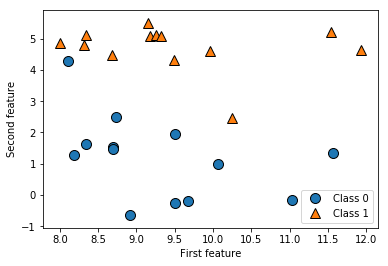

In [2]:
# forgeデータセット(2features * 26)
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

X.shape: (40, 1)


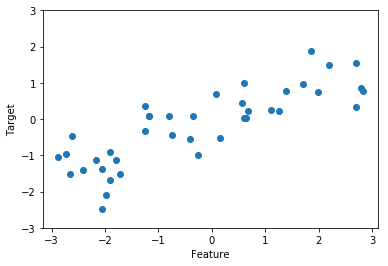

In [3]:
# waveデータセット(1feature * 40)
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
print("X.shape: {}".format(X.shape))

In [4]:
# cancerデータセット(30 features * 569)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))


cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
# bostonデータセット(13featuresをfeature engineeringして 104features * 506)
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

Data shape: (506, 13)
X.shape: (506, 104)


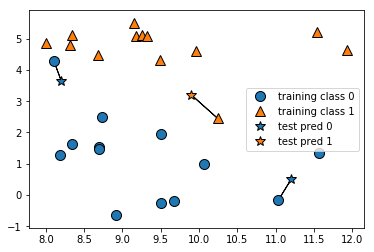

In [6]:
# k最近傍法による分類(k=1)
mglearn.plots.plot_knn_classification(n_neighbors=1)

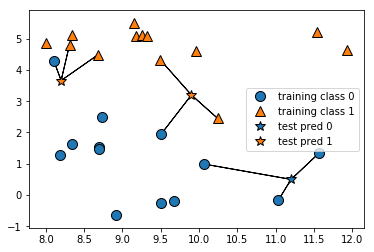

In [7]:
# k最近傍法による分類(k=3)
mglearn.plots.plot_knn_classification(n_neighbors=3)

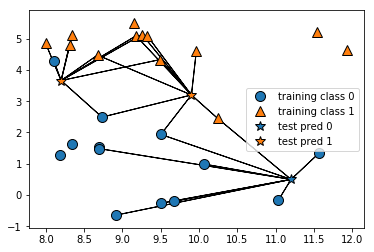

In [8]:
# k最近傍法による分類(k=9)
mglearn.plots.plot_knn_classification(n_neighbors=9)

In [9]:
# forgeのデータセットとテストセットから分類機を作成

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from  sklearn.neighbors  import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)


clf.fit(X_train,  y_train)

print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


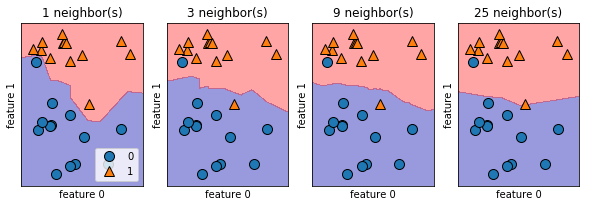

In [10]:
# KNeighborsClassifierの解析
fig, axes = plt.subplots(1, 4, figsize=(10, 3))

# 決定境界の描画
for n_neighbors, ax in zip([1, 3, 9,25 ], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=4)

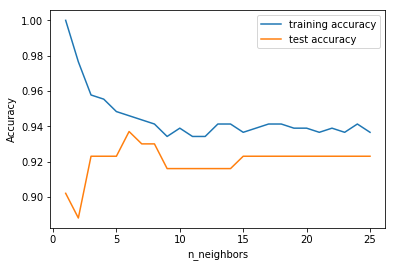

In [11]:
# 最近傍点に対する訓練精度とテスト精度
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 25
neighbors_settings = range(1, 26)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

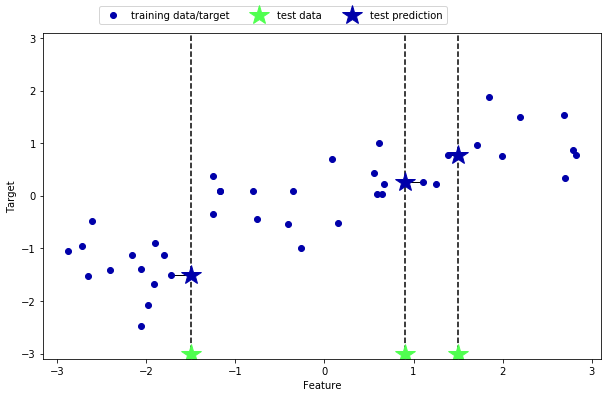

In [12]:
# waveデータを用いたk近傍回帰(k=1)
mglearn.plots.plot_knn_regression(n_neighbors=1)

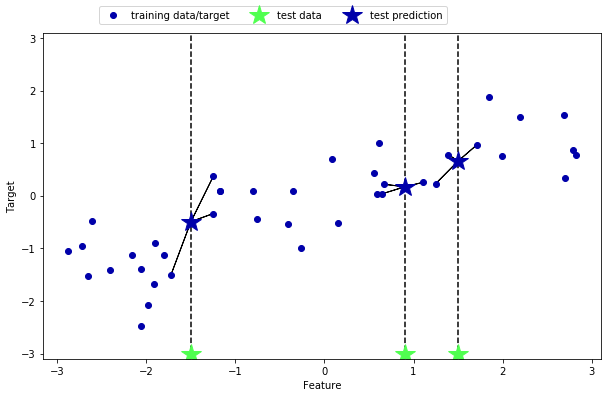

In [13]:
# k近傍回帰(k=3)
mglearn.plots.plot_knn_regression(n_neighbors=3)

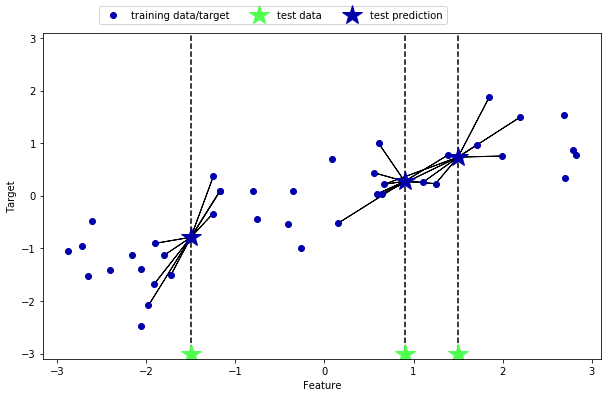

In [14]:
# k近傍回帰(k=9)
mglearn.plots.plot_knn_regression(n_neighbors=9)

In [15]:
# k=3のKNeighborRegressorから決定係数R^2を求める
# 決定係数は0-1の範囲を取り、1に近いほど良いモデル
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)


print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


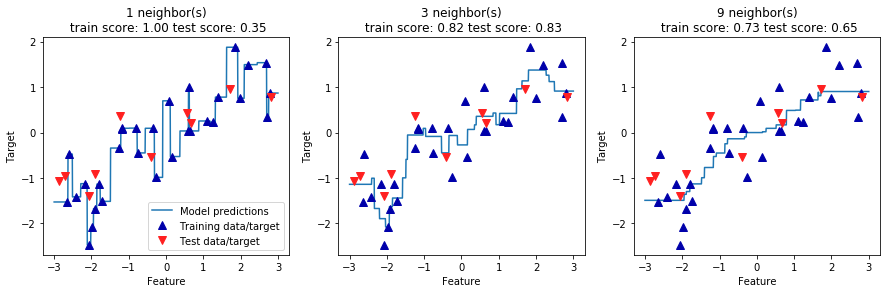

In [16]:
# KNeighborRegressorの解析
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

# k=1だと予測は不安定であり、kを増やしていくと予測はスムーズになるが訓練データに対する適合度が下がる

In [17]:
# 線形モデル

# 最小二乗法
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train
                           )
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score(wave): {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score(wave): {:.2f}".format(lr.score(X_test, y_test)))

# 高次なデータセットを利用
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score(boston): {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score(boston): {:.2f}".format(lr.score(X_test, y_test)))

# 訓練セットとデータセットで性能が大きく異なるのはoverfittingが起きているため

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score(wave): 0.67
Test set score(wave): 0.66
Training set score(boston): 0.95
Test set score(boston): 0.61


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [18]:
# リッジ回帰
# 最小二乗法に正規化項(L2ノルム)を桑会える
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test))) 

# Training set scoreはLinearRegressionよりも低く、Test set scoreに対するスコアは高い
# LinearRegressionモデルよりもRidgeモデルのほうが汎化性能が高い

Training set score: 0.89
Test set score: 0.75


Training set score(alpha=0.1): 0.93
Test set score(alpha=0.1): 0.77
Training set score(alpha=1): 0.89
Test set score(alpha=1): 0.75
Training set score(alpha=10): 0.79
Test set score(alpha=10): 0.64


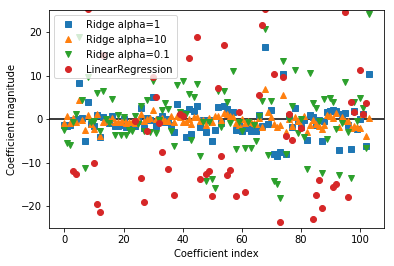

In [19]:
# alphaパラメータのチューニング
from sklearn.linear_model import Ridge

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score(alpha=0.1): {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score(alpha=0.1): {:.2f}".format(ridge01.score(X_test, y_test)))

ridge = Ridge().fit(X_train, y_train)
print("Training set score(alpha=1): {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score(alpha=1): {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score(alpha=10): {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score(alpha=10): {:.2f}".format(ridge10.score(X_test, y_test)))

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

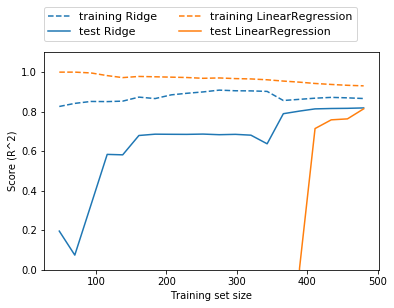

In [20]:
# bostonデータセットに対するリッジ回帰と線形回帰の学習曲線
mglearn.plots.plot_ridge_n_samples()

# データが少ない場合にリッジ回帰のテストスコアが高い
# 十分なデータある場合は正規化はあまり重要ではなくなる

Training set score: 0.29
Test set score: 0.21
Number of features used: 4
Training set score(alpha=0.01): 0.90
Test set score(alpha=0.01): 0.77
Number of features used(alpha=0.01): 33
Training set score(alpha=0.0001): 0.95
Test set score(alpha=0.0001): 0.64
Number of features used(alpha=0.0001): 94


Text(0,0.5,'Coefficient magnitude')

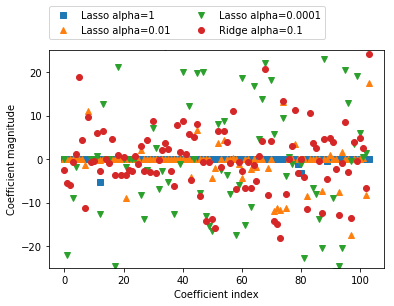

In [21]:
# ラッソ回帰
# L1正規化によって係数が0になる
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score(alpha=0.01): {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score(alpha=0.01): {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used(alpha=0.01): {}".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score(alpha=0.0001): {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score(alpha=0.0001): {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used(alpha=0.0001): {}".format(np.sum(lasso00001.coef_ != 0)))

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# alphaを小さくしすぎると、リッジと同様に正規化の効果が薄れてoverfittingになる
# まずはリッジ回帰を試す。特徴量がたくさんあってそのうち重要なものが僅かであれば、ラッソが良い
# scikit-learnにはLassoとRidgeを組み合わせたElasticNetがある。良い結果をもたらすがL1正規化パラメータとL2正規化パラメータのチューニングが必要

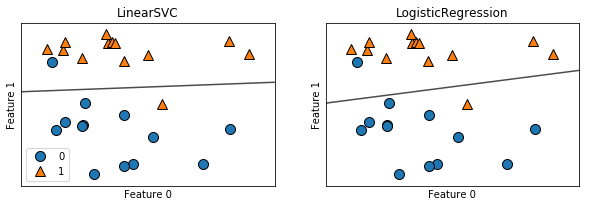

In [22]:
# 線形モデルのクラス分類
# 一般的な線形クラス分類アルゴリズムは「ロジスティック回帰」と「線形サポートベクタマシーン」
# ロジスティック回帰は回帰アルゴリズムではなくクラス分類アルゴリズム

# LogisticRegressionとLinearSVCをforgeデータセットに適用して、決定境界を可視化
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

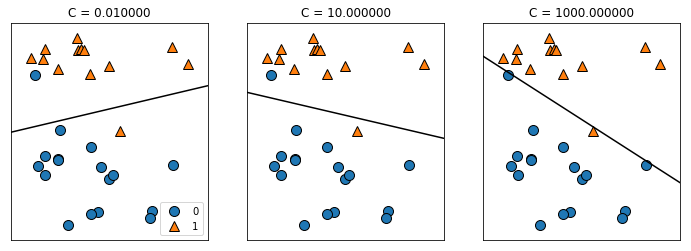

In [23]:
# 正規化の強度を決定するトレードオフパラメータCを変化させたときの決定境界
mglearn.plots.plot_linear_svc_regularization()

# C=100はoverfittingになっている

Training set score(C=0.01): 0.934
Test set score(C=0.01): 0.930
Training set score(C=1): 0.955
Test set score(C=1): 0.958
Training set score(C=100): 0.972
Test set score(C=100): 0.965


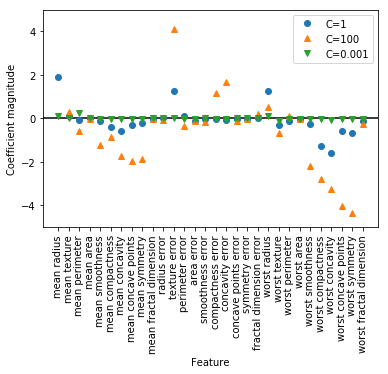

In [24]:
#  cancerデータセットを用いてCを変化させたときのロジスティック回帰のスコア
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score(C=0.01): {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score(C=0.01): {:.3f}".format(logreg001.score(X_test, y_test)))

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score(C=1): {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score(C=1): {:.3f}".format(logreg.score(X_test, y_test)))

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score(C=100): {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score(C=100): {:.3f}".format(logreg100.score(X_test, y_test)))

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

# C=100の複雑なモデルのほうが性能が高い

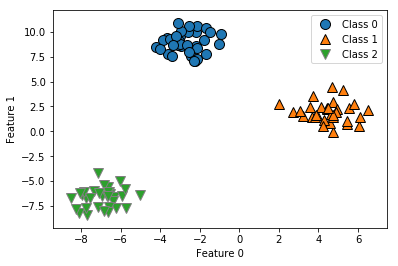

In [25]:
# 多クラス分類。一対その他でそれぞれ分類
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


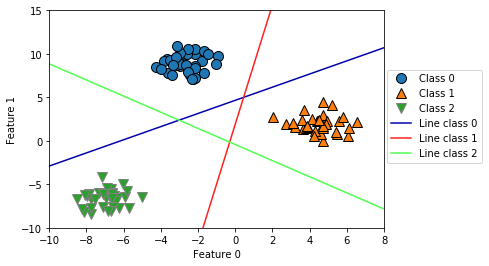

In [26]:
# 多クラス分類の学習と可視化
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0,0.5,'Feature 1')

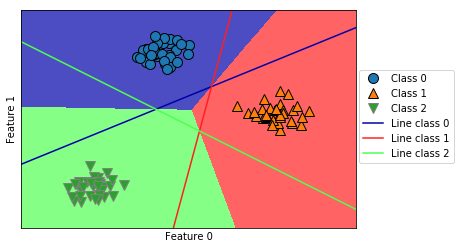

In [27]:
# 中央の三角形の部分の境界はどうするか
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [28]:
# ナイーブベイズクラス分類器
#訓練は線形モデルより高速
# 汎化性能はLogisticRegressionやLinearSVCよりもわずかに劣る場合が多い
# scikit-learnには、GaussianNB, BernoulliNB, MultinomialNBの3つが実装されている
# GaussianNBは任意の連続値データ、BernoulliNBは2値データ, MultinomialNBはカウントデータに適用

# 非ゼロ特徴量の数
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [29]:
# 決定木
# yes/noで答えられる質問の階層構造

# 決定木の複雑になりすぎると訓練データに対してoverfittingとなってしまう
# これを防ぐために、木の生成を制限する事前枝刈り(pre-pruning)と事後枝刈り(post-pruning)がある
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# 事前枝刈りをしない場合
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# 事前枝刈りをした場合(max_depth=4)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set(pre-pruning): {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set(pre-pruning): {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937
Accuracy on training set(pre-pruning): 0.988
Accuracy on test set(pre-pruning): 0.951


Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


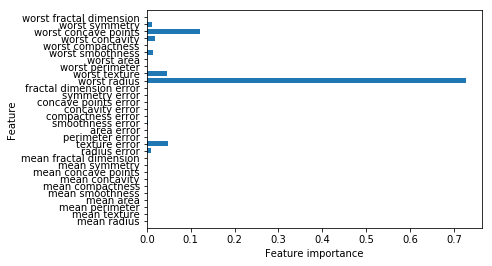

In [30]:
# 決定木の特徴量の重要度
# 0は全く使われていない、1は完全にターゲットを予想できる
from sklearn.tree import export_graphviz
import graphviz
print("Feature importances:\n{}".format(tree.feature_importances_))

# 特徴量の重要度の可視化
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)
# worst radiusが0.72と最も重要

# 決定木の長所
# 1. モデルが容易に可視化できる
# 2. データのスケールに対して普遍
# 決定木の短所
# 1. overfittingしやすく汎化性能が低い → 次で述べるアンサンブル法で解決

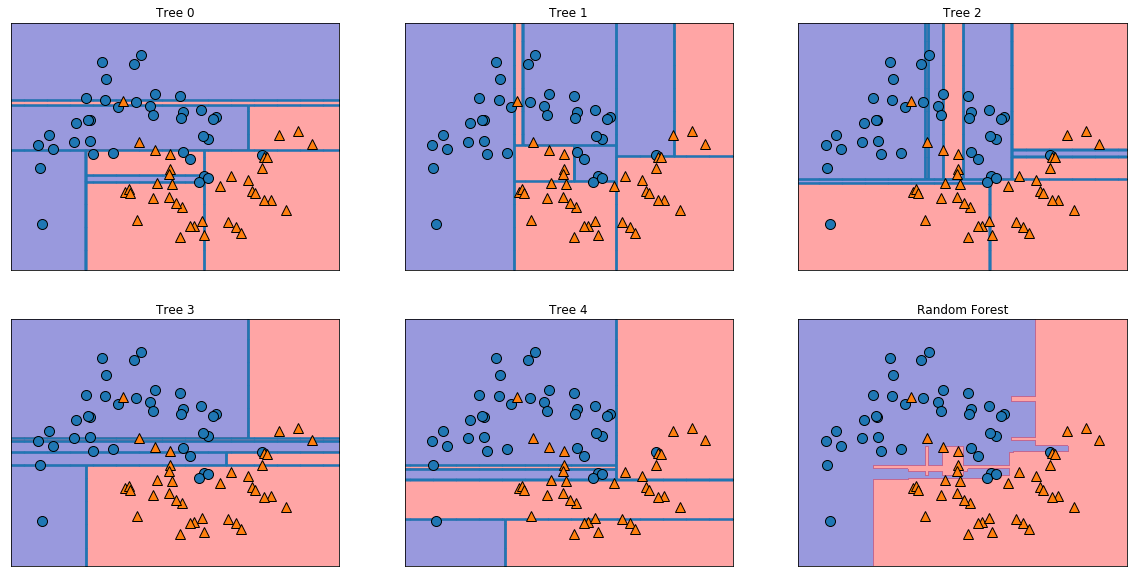

In [31]:
# ランダムフォレスト
# overfittingを減らすためにたくさんの決定木を使う

# ランダムフォレストの構築には、ブートストラップサンプリングでランダムにサンプルを選び決定木を作る
# このとき特徴量をランダムに選ぶ

# two_moonsデータセットに対してランダムフォレストを適用
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

# 5つの決定木とそれらを平均したランダムフォレスト
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Accuracy on training set: 1.000
Accuracy on test set: 0.972


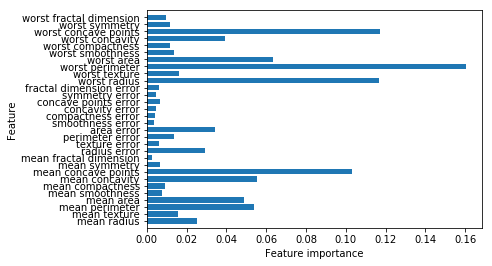

In [32]:
# cancerデータセットに対して100この決定木を用いたランダムフォレスト
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

# テストセットの精度が97%と高い

# 特徴量の重要度の可視化
plot_feature_importances_cancer(forest)

Accuracy on training set: 1.000
Accuracy on test set: 0.958
Accuracy on training set(max_depth=1): 0.991
Accuracy on test set(max_depth=1): 0.972
Accuracy on training set(learning_rate=0.01): 0.988
Accuracy on test set(learning_rate=0.01): 0.965


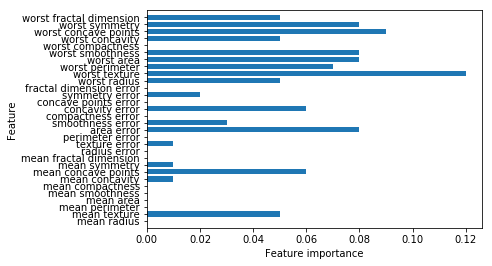

In [33]:
# 勾配Boosting回帰木
# これも複数の決定木を組み合わせる。
# ランダムフォレストと違って、1つ前の決定木の誤りを次の決定木で修正する。学習率で補正度合いを制御

# 深さ3の決定木を100。学習率は0.1
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

# 上の木だとoverfittingしているので深さを1にする
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set(max_depth=1): {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set(max_depth=1): {:.3f}".format(gbrt.score(X_test, y_test)))

# もしくは学習率を0.01に下げる
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set(learning_rate=0.01): {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set(learning_rate=0.01): {:.3f}".format(gbrt.score(X_test, y_test)))

# 特徴量の重要度の可視化
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)